설명서 및 예제코드 활용

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.DataFrame()

In [4]:
df.plot?

    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

In [5]:
ts = pd.Series(np.random.randn(1000),
   ...:                index=pd.date_range('1/1/2000', periods=1000))
   ...: 

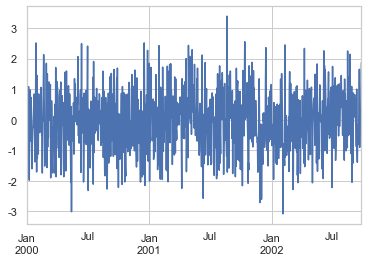

In [8]:
ts.plot()

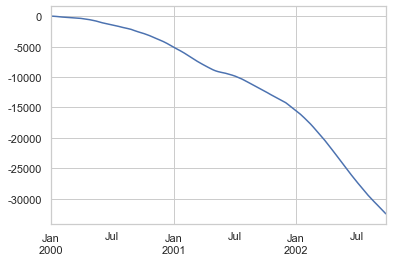

In [10]:
ts = ts.cumsum()
ts.plot()

In [11]:
df = pd.DataFrame(np.random.randn(1000, 4),
   ...:                   index=ts.index, columns=list('ABCD'))

In [13]:
df.shape

(1000, 4)

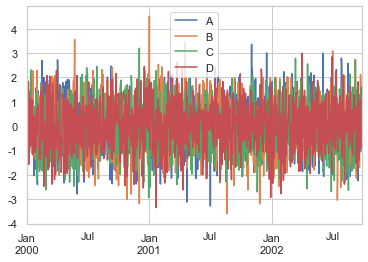

In [16]:
df.plot()

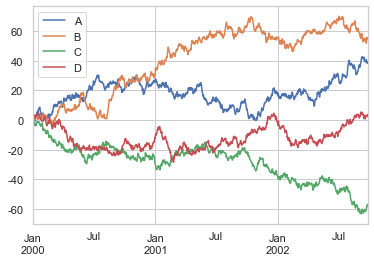

In [18]:
df.cumsum().plot()

In [20]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3.head()

,B,C
0,0.472549,-0.360254
1,1.082740,-1.285047
2,1.553936,-2.399212
3,2.851248,-3.057884
4,1.577924,-4.071678


In [22]:
df3['A']= pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,0.472549,-0.360254,0
1,1.082740,-1.285047,1
2,1.553936,-2.399212,2
3,2.851248,-3.057884,3
4,1.577924,-4.071678,4


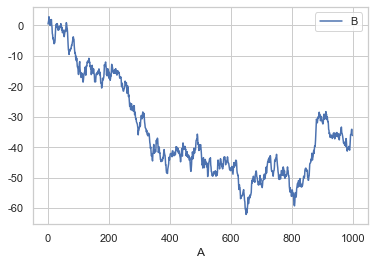

In [23]:
df3.plot(x='A',y='B')

# bar plot

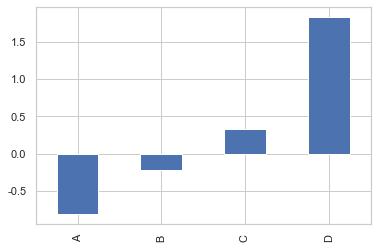

In [26]:
df.iloc[5].plot(kind='bar')

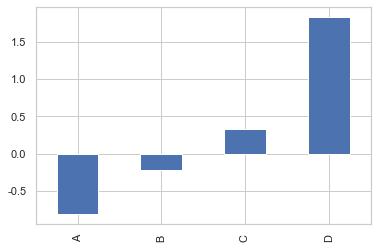

In [31]:
df.iloc[5].plot.bar()

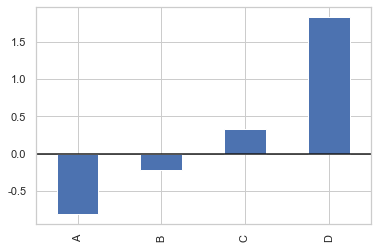

In [33]:
df.iloc[5].plot.bar()
plt.axhline(0, color='k') # 가로 선 0 기준으로 생김

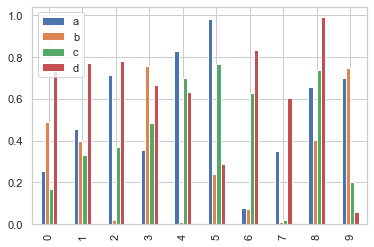

In [36]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()

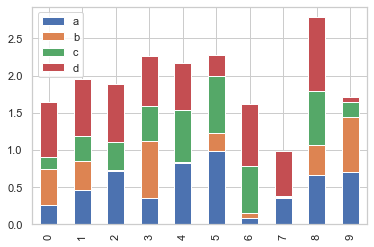

In [38]:
# stacked = True 옵션 => 누적해서 보여줌
df2.plot.bar(stacked=True)

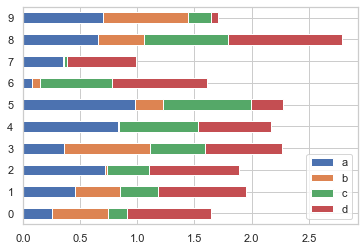

In [41]:
df2.plot.barh(stacked=True)

# histogram

- bin : 히스토그램의 한 구간

In [44]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
   ....:                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.head()

,a,b,c
0,-0.345307,0.760668,-1.189989
1,1.535392,-0.170013,-2.172108
2,0.161977,1.684423,-1.603785
3,0.768863,0.510841,-1.063511
4,0.868064,0.049565,-0.289606


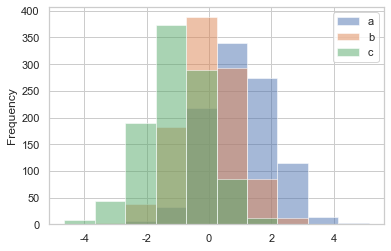

In [45]:
# alpha = 투명도
df4.plot.hist(alpha=0.5)

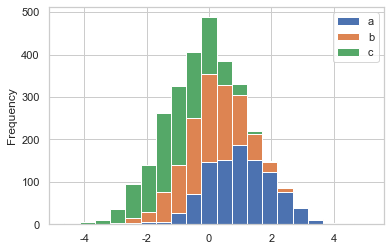

In [46]:
df4.plot.hist(stacked=True, bins=20)

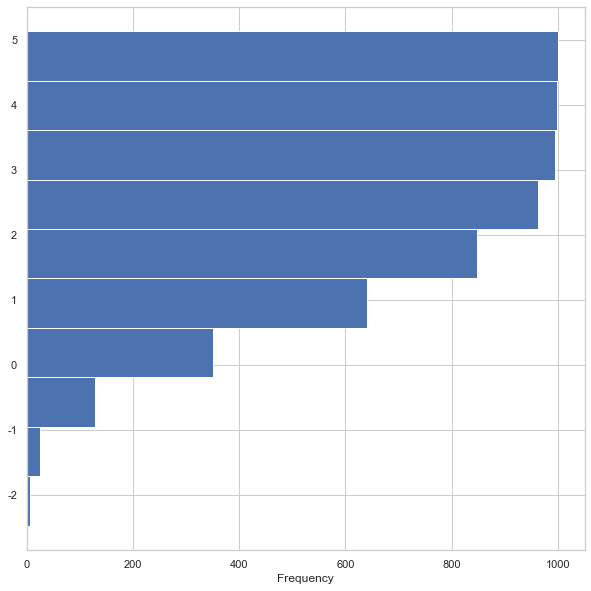

In [48]:
plt.figure(figsize=(10,10))
df4['a'].plot.hist(orientation='horizontal', cumulative=True)


In [60]:
# 차분 후 히스토그램! (a[1]-a[0] = a[1] 로)

df4['a_diff'] = df4['a'].diff()
df4[['a','a_diff']].head(3)

,a,a_diff
0,-0.345307,NaN
1,1.535392,1.880699
2,0.161977,-1.373415


In [61]:
df4['a_shift'] = df4['a'].shift(1)
df4.head()

,a,b,c,a_diff,a_shift
0,-0.345307,0.760668,-1.189989,NaN,NaN
1,1.535392,-0.170013,-2.172108,1.880699,-0.345307
2,0.161977,1.684423,-1.603785,-1.373415,1.535392
3,0.768863,0.510841,-1.063511,0.606886,0.161977
4,0.868064,0.049565,-0.289606,0.099201,0.768863


In [64]:
# .diff 가 정말 차분인지 확인
# a[1] - a[0].shift(1) == a_minus[1] == a_diff[1] ? 

df4['a_minus'] = df4['a'] - df4['a_shift']
df4.head()

,a,b,c,a_diff,a_shift,a_minus
0,-0.345307,0.760668,-1.189989,NaN,NaN,NaN
1,1.535392,-0.170013,-2.172108,1.880699,-0.345307,1.880699
2,0.161977,1.684423,-1.603785,-1.373415,1.535392,-1.373415
3,0.768863,0.510841,-1.063511,0.606886,0.161977,0.606886
4,0.868064,0.049565,-0.289606,0.099201,0.768863,0.099201


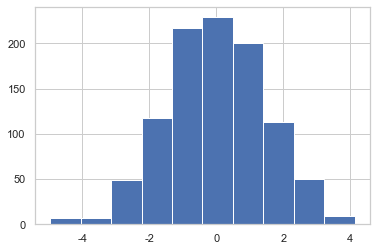

In [66]:
df4['a_diff'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ee3e790>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

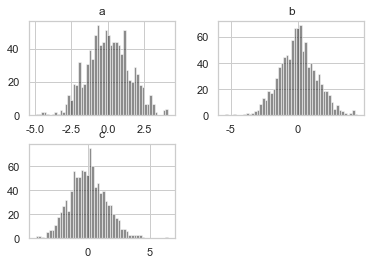

In [69]:
plt.figure(figsize = (20,20))
df4[['a','b','c']].diff().hist(color='k',alpha=0.5,bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ee7b350>,
      dtype=object)

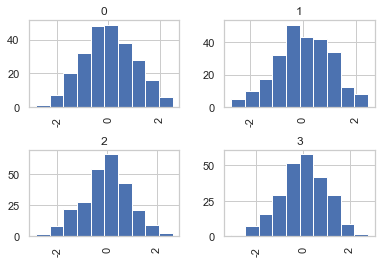

In [70]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

In [71]:
data2 = pd.DataFrame({'a':np.random.randn(1000),
                     'b':np.random.randint(0,4,1000),
                     })

data2.head()

,a,b
0,0.263251,0
1,1.018433,1
2,-0.526773,0
3,0.701888,1
4,-1.533248,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fc54190>,
      dtype=object)

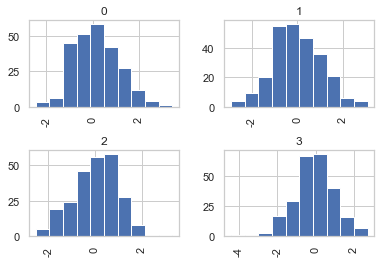

In [73]:
data2['a'].hist(by=data2['b'],figsize=(6,4))

# box plot

- 5가지 수치 요약 자료
- 최대값, 1사분위, 2사분위(중앙값), 3사분위, 최대값

In [77]:
# 10개의 행, 5개의 컬럼을 가진 난수 생성
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df

,A,B,C,D,E
0,0.592931,0.350117,0.208416,0.924334,0.847443
1,0.515948,0.551719,0.397264,0.277799,0.087777
2,0.047245,0.724574,0.314861,0.670598,0.266154
3,0.234971,0.420655,0.969524,0.813536,0.894295
4,0.151199,0.731699,0.760689,0.673725,0.219662
5,0.386861,0.875246,0.839673,0.795086,0.288803
6,0.291911,0.205603,0.055036,0.588627,0.663123
7,0.590123,0.037168,0.729730,0.724530,0.828596
8,0.982728,0.678260,0.854902,0.705072,0.485887
9,0.701107,0.642989,0.116172,0.096502,0.292418


In [78]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.449502,0.521803,0.524627,0.626981,0.487416
std,0.282445,0.263463,0.341829,0.252980,0.298195
min,0.047245,0.037168,0.055036,0.096502,0.087777
25%,0.249206,0.367751,0.235027,0.609120,0.271816
50%,0.451405,0.597354,0.563497,0.689399,0.389153
75%,0.592229,0.712995,0.819927,0.777447,0.787228
max,0.982728,0.875246,0.969524,0.924334,0.894295


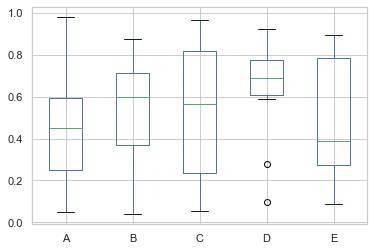

In [80]:
# 동그란 점들은 이상치를 의미
df.plot.box()

In [81]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
   ....:          'medians': 'DarkBlue', 'caps': 'Gray'}

color

{'boxes': 'DarkGreen',
 'whiskers': 'DarkOrange',
 'medians': 'DarkBlue',
 'caps': 'Gray'}

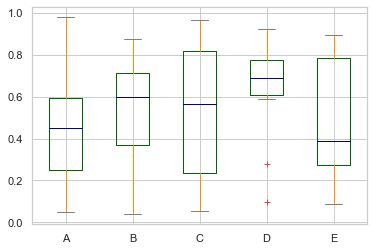

In [83]:
# sym = r+ 는 symbol을 빨간색, + 모양으로 표시해라 (이상치)
df.plot.box(color=color, sym='r+')

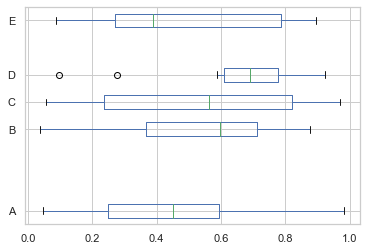

In [84]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [87]:
df = pd.DataFrame(np.random.rand(10, 5))
df

,0,1,2,3,4
0,0.369767,0.735676,0.416109,0.726351,0.603423
1,0.405951,0.874881,0.380519,0.041235,0.777004
2,0.184266,0.577926,0.511408,0.674864,0.466123
3,0.372588,0.802970,0.882657,0.881021,0.389911
4,0.382907,0.737298,0.986861,0.677764,0.212934
5,0.570152,0.229558,0.598025,0.175420,0.107753
6,0.237010,0.960497,0.930149,0.379766,0.048695
7,0.458225,0.197290,0.795140,0.252469,0.480455
8,0.764497,0.857577,0.127124,0.460764,0.564294
9,0.448353,0.592084,0.388164,0.128942,0.887981


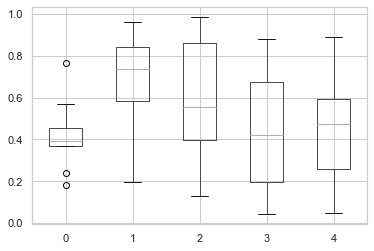

In [88]:
bp = df.boxplot()

In [90]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])

df.head(2)

,Col1,Col2
0,0.861638,0.285856
1,0.098984,0.328701


In [91]:
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

df.head(2)

,Col1,Col2,X
0,0.861638,0.285856,A
1,0.098984,0.328701,A


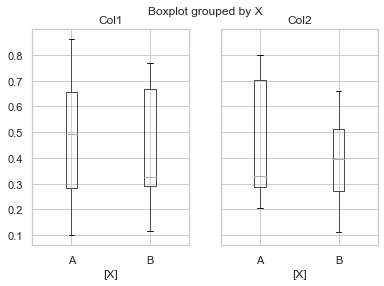

In [92]:
bp = df.boxplot(by='X')

In [99]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['Col1', 'Col2', 'Col3'])


In [100]:
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'])
df

,Col1,Col2,Col3,X,Y
0,0.811767,0.619006,0.271560,A,A
1,0.461913,0.932172,0.782401,A,B
2,0.962843,0.425446,0.600067,A,A
3,0.046888,0.921453,0.135658,A,B
4,0.255670,0.463849,0.269419,A,A
5,0.511917,0.698324,0.337670,B,B
6,0.766970,0.788132,0.977851,B,A
7,0.956956,0.910272,0.577783,B,B
8,0.465246,0.574029,0.858069,B,A
9,0.002444,0.264712,0.109233,B,B


<Figure size 432x288 with 0 Axes>

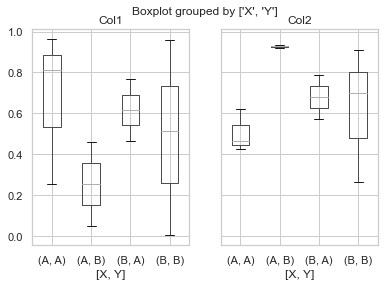

In [101]:
plt.figure();
bp = df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])

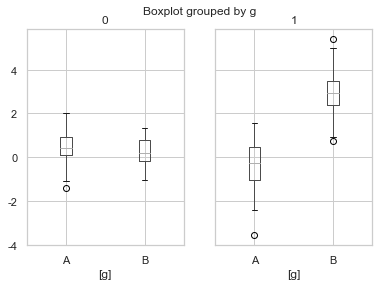

In [103]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3

bp = df_box.boxplot(by='g')

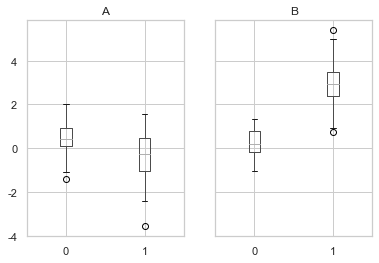

In [105]:
bp = df_box.groupby('g').boxplot()

# Area plot

- 기본적으로 na값을 0으로 채워주고 area plot 그려줌
- 기본적으로 stacked = True 가 디폴트. 즉, 누적해서 영역을 가져가줌

In [112]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.787928,0.856477,0.727796,0.692345
1,0.472351,0.856873,0.664743,0.333376
2,0.518145,0.394689,0.031050,0.576840
3,0.850252,0.951489,0.682979,0.076163
4,0.410078,0.041901,0.174187,0.565402


<Figure size 2160x2160 with 0 Axes>

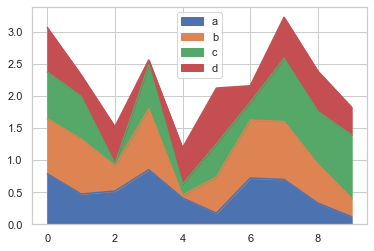

In [113]:
plt.figure(figsize=(30,30))
df.plot.area()

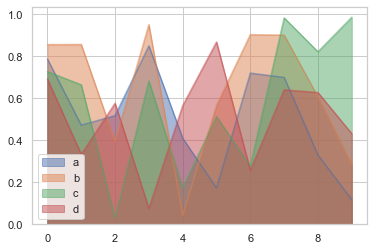

In [114]:
df.plot.area(stacked = False)

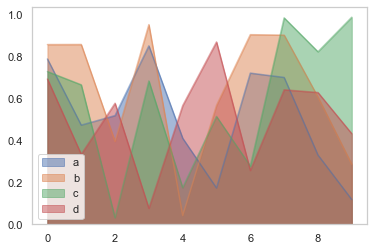

In [115]:
df.plot.area(stacked = False,grid=False)

# scatter plot

- x축, y축을 꼭 지정해줘야 함

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


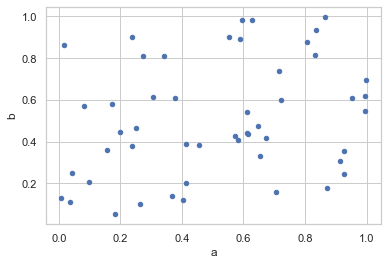

In [118]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

In [119]:
df.head()

,a,b,c,d
0,0.704768,0.159077,0.439404,0.629330
1,0.925058,0.356988,0.819133,0.640143
2,0.715052,0.738423,0.971000,0.246049
3,0.042582,0.247797,0.045017,0.705462
4,0.834707,0.934136,0.470793,0.512360


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


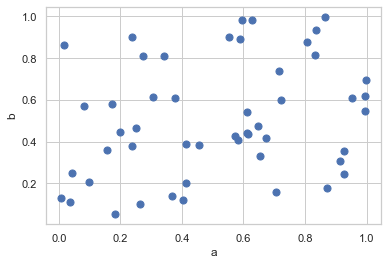

In [121]:
# s => 점 크기
df.plot.scatter(x='a', y='b',s=50)

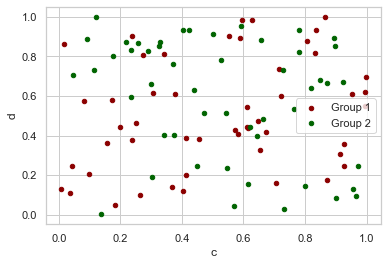

In [127]:
ax = df.plot.scatter(x='a', y='b', color='Darkred', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)




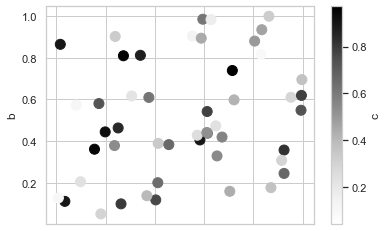

In [130]:
# c라는 옵션 추가
df.plot.scatter(x='a', y='b', c='c', s=100);


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


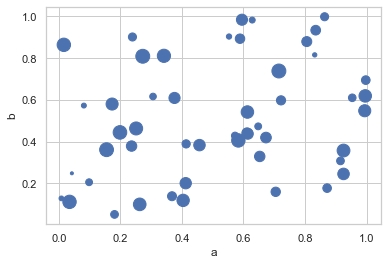

In [132]:
# c 숫자들의 크기를 크게 해라
df.plot.scatter(x='a', y='b', s=df['c'] * 200);

# hexagonal bin plot

- scatter plot 단점을 보완
- scatter plot 은 데이터가 클 때 각각의 점을 표현하기에 어려움

- 히스토그램과도 비슷한 점이 있음 (binning 을 해서 데이터의 크고 작음을 볼 수도 있음)

In [137]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.tail(5)

,a,b
995,0.041438,993.270659
996,1.372180,996.305236
997,-1.880589,995.933677
998,2.228689,998.512232
999,-0.812381,998.824609


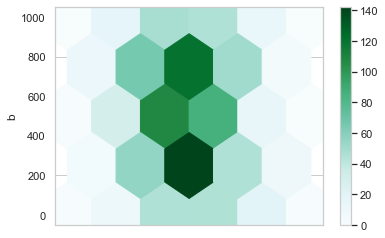

In [140]:
df.plot.hexbin(x='a', y='b', gridsize=5)

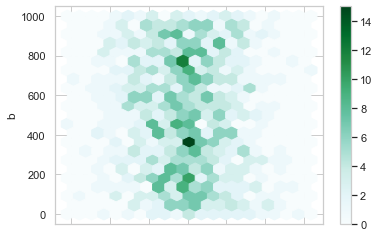

In [142]:
# gridsize 조정
df.plot.hexbin(x='a', y='b', gridsize=20)

In [143]:
df['z'] = np.random.uniform(0, 3, 1000)

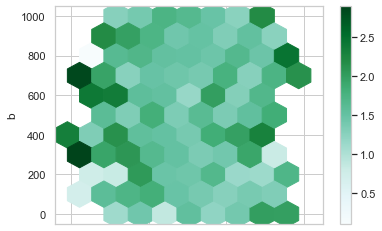

In [148]:
# C라는 요소를 새로 추가. 빈의 모든 값을 단일 숫자로 표현(max, min 함수 등으로)

df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.mean, gridsize=10)



# scatter matrix plot

In [152]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.950904,-0.397783,-1.395342,0.745481
1,-0.170761,-0.679878,0.537192,0.164205
2,0.092665,-0.848834,0.814872,-1.133791
3,0.222088,-1.365652,-0.485499,1.018857
4,-1.729989,1.872874,-0.681644,0.363890


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f5d0d50>,
      dtype=object)

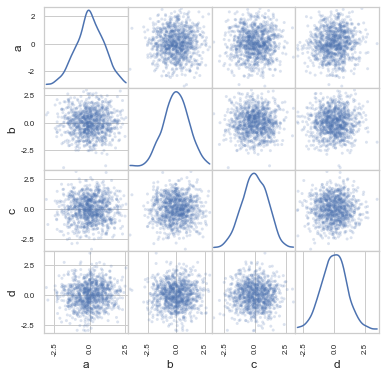

In [154]:
# kde = kernel density estimate
# kde = 커널 밀도 함수
# 대각선에 ked 플롯을 그리게 함 -> (a,a),(b,b)에는 각각 a,b 등의 kde가 들어가고
# 나머지 영역에는 스캐터 플롯이 들어감

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


# kde, 커널밀도함수 = 확률밀도함수

- 이산적인 데이터를 연속데이터의 정규분포화 하여 확률밀도함수로 표현해줌

- 어떻게 이산적인 데이터를 연속적으로 정규분포화 하는가?

- 1) 기존의 히스토그램을 바탕으로 '밀도'라는 것을 추정해, 밀도함수를 만들 것이다.
- 2) 그렇다면 밀도는 어떻게 추정하는 가?
        - 모수적 방법 / 비모수적 방법이 있다.
        - 모수적 방법 : 해당 분포가 이미 우리가 아는 베르누이, 정규분포 등을 따를 때, 그 분포의 밀도함수를 사용(=추정)
        - 비모수적 방법 : 해당 분포가 우리가 아는 분포가 아닐 때, 기존 관측된 데이터를 가지고 밀도함수를 추정. 이때, 가장 많이 사용되는 방법이 히스토그램 추정.
            - 히스토그램 추정 : 관측된 데이터로 히스토그램을 구해서, 이를 확률 밀도 함수로 사용
            
            
- 3) 이처럼, 모르는 분포의 밀도함수(pdf)를 추정하는 비모수적 방법을 커널밀도추정(KDE) 라고 한다.

- 4) 커널밀도추정(KDE) = 관측된 히스토그램 데이터에 커널함수 적용해 밀도함수 추정

- 5) 커널함수는 주로 계산 편의상 가우시안 커널을 사용
    원점중심 대칭 + 적분값 1
    
    
    
* con) 
    - 즉, 커널함수 = 스무딩 + 연속성 부여 함수
    - 비연속적 데이터(히스토그램)에 커널함수(보통 가우시안) 적용해 스무딩
    - 이렇게 커널함수를 먹여 밀도함수를 추정(KDE)해서 함수를 만든 것 = kde plot() 해서 나온 확률밀도 함수

<참고>

http://blog.daum.net/tlos6733/136

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1319d6090>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

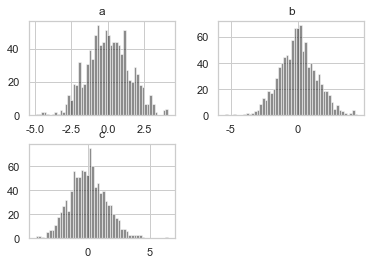

In [156]:
# density plot -> 이산적인 플롯(히스토그램)을 연속적으로 부드럽게 바꿔준 것

# 이산적인 데이터의 플롯은 이렇게 끊겨서 막대형태로 나옴
plt.figure(figsize = (20,20))
df4[['a','b','c']].diff().hist(color='k',alpha=0.5,bins=50)

In [158]:
# density plot 은 이걸 부드럽게 곡선으로 그려줌!
# 어떻게 바꿔주는 가? 

# You can create density plots using the Series.plot.kde() and DataFrame.plot.kde() methods.


In [159]:
ser = pd.Series(np.random.randn(1000))

In [160]:
ser

0     -1.332522
1      0.275046
2      0.729359
3     -1.208093
4     -0.174091
         ...   
995   -0.101645
996    0.687142
997    0.121554
998   -1.796502
999   -0.792168
Length: 1000, dtype: float64

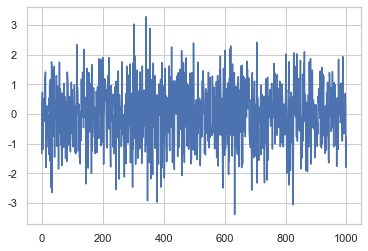

In [161]:
ser.plot()

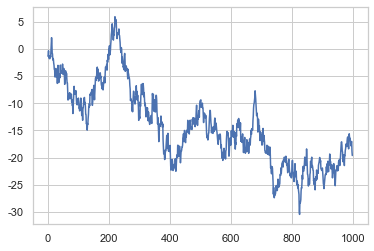

In [163]:
ser.cumsum().plot()

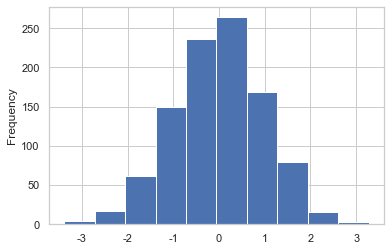

In [165]:
# 히스토그램은 왼쪽에 프리퀀시

ser.plot.hist()

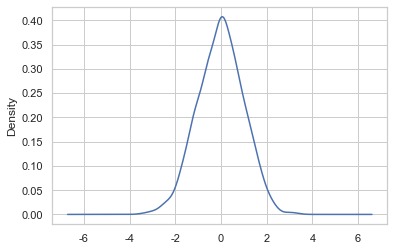

In [168]:
# 덴시티 플롯은 왼쪽에 덴시티

ser.plot.density()

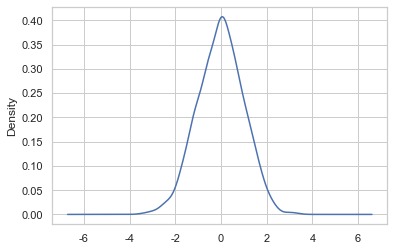

In [170]:
# 덴시티 플롯과 kde는 같은 것

ser.plot.kde()